In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 결합데이터_20200629.csv to 결합데이터_20200629 (1).csv


In [ ]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
!ls

'결합데이터_20200629 (1).csv'   결합데이터_20200629.csv   sample_data


In [ ]:
df =pd.read_csv('결합데이터_20200629 (1).csv', encoding='cp949')
df.head()

,id,lon,lat,충전소수,건물1,건물2,건물3,행정기관,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구
0,349,128.35251,35.70456,0,0,0,0,0,0,0,0,0,0,0,0,0
1,350,128.35225,35.70395,0,0,0,0,0,0,0,0,0,0,0,0,0
2,351,128.35217,35.70309,0,0,0,0,0,0,0,0,0,0,0,0,0
3,352,128.35214,35.70219,0,0,0,0,0,0,0,0,0,0,0,0,0
4,353,128.35210,35.70129,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,id,lon,lat,충전소수,건물1,건물2,건물3,행정기관,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구
count,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000
mean,87675.921884,128.564911,35.829441,0.001780,0.621859,0.056507,0.010939,0.009550,0.002150,7.171179,0.000985,0.000213,0.095492,0.007434,212.971998,0.108894
std,41107.533445,0.100147,0.094754,0.044229,2.214315,0.366360,0.139107,0.108779,0.046315,85.206131,0.031374,0.017385,2.361095,0.876798,822.728290,0.311508
min,349.000000,128.352040,35.606730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52527.750000,128.478960,35.756640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88691.500000,128.567930,35.838015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,122536.250000,128.649710,35.902720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000
max,169143.000000,128.762440,36.015650,3.000000,79.000000,16.000000,6.000000,6.000000,1.000000,8590.000000,1.000000,2.000000,482.000000,255.000000,43450.000000,1.000000


In [ ]:
dummies = ['행정기관']
binary = ['충전소수','건물1','건물2','건물3','복지관수(북구)']
minmax = ['나드리콜','장애인등록(북구)','전동구(북구)','노인유동']

In [ ]:
df.isna().sum()

id           0
lon          0
lat          0
충전소수         0
건물1          0
건물2          0
건물3          0
행정기관         0
도서관          0
나드리콜         0
지하철역         0
복지관수(북구)     0
장애인등록(북구)    0
전동구(북구)      0
노인유동         0
시군구          0
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns = dummies)
df.head()

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6
0,349,128.35251,35.70456,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,350,128.35225,35.70395,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,351,128.35217,35.70309,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,352,128.35214,35.70219,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,353,128.35210,35.70129,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
binarizer = Binarizer().fit(df[binary])
df_binary = binarizer.transform(df[binary])
df[binary] = pd.DataFrame(df_binary)
df.head()

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6
0,349,128.35251,35.70456,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,350,128.35225,35.70395,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,351,128.35217,35.70309,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,352,128.35214,35.70219,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,353,128.35210,35.70129,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.describe()

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6
count,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000,89316.000000
mean,87675.921884,128.564911,35.829441,0.001702,0.153567,0.035906,0.008252,0.002150,7.171179,0.000985,0.000168,0.095492,0.007434,212.971998,0.108894,0.991368,0.007882,0.000649,0.000056,0.000034,0.000011
std,41107.533445,0.100147,0.094754,0.041218,0.360535,0.186057,0.090463,0.046315,85.206131,0.031374,0.012958,2.361095,0.876798,822.728290,0.311508,0.092509,0.088431,0.025475,0.007482,0.005796,0.003346
min,349.000000,128.352040,35.606730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52527.750000,128.478960,35.756640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88691.500000,128.567930,35.838015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,122536.250000,128.649710,35.902720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,169143.000000,128.762440,36.015650,1.000000,1.000000,1.000000,1.000000,1.000000,8590.000000,1.000000,1.000000,482.000000,255.000000,43450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


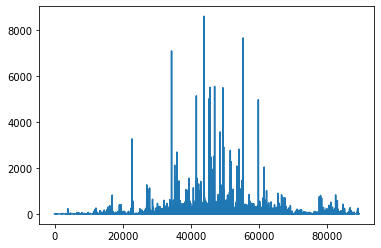

In [ ]:
df["나드리콜"].plot()

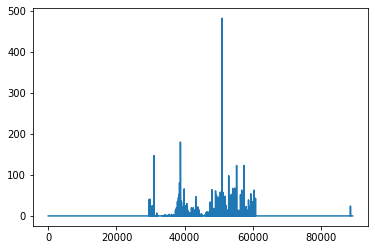

In [ ]:
df["장애인등록(북구)"].plot()

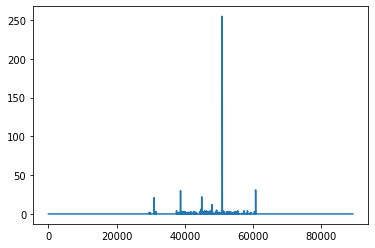

In [ ]:
df["전동구(북구)"].plot()

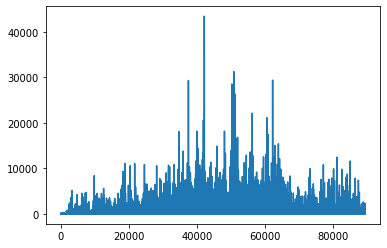

In [ ]:
df["노인유동"].plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[minmax] = scaler.fit_transform(df[minmax])
df.head()

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6
0,349,128.35251,35.70456,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0
1,350,128.35225,35.70395,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0
2,351,128.35217,35.70309,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0
3,352,128.35214,35.70219,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0
4,353,128.35210,35.70129,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0


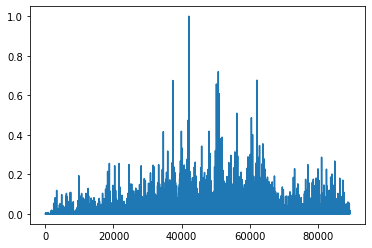

In [ ]:
df["노인유동"].plot()

In [ ]:
df["충전소수"].value_counts()

0    89164
1      152
Name: 충전소수, dtype: int64

In [ ]:
df['분류기준'] = df['건물1']+df['건물2']+df['건물3']
df.head()

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6,분류기준
0,349,128.35251,35.70456,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0
1,350,128.35225,35.70395,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0
2,351,128.35217,35.70309,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0
3,352,128.35214,35.70219,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0
4,353,128.35210,35.70129,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1,0,0,0,0,0,0


In [ ]:
df["분류기준"].value_counts()

0    74305
1    12491
2     2391
3      129
Name: 분류기준, dtype: int64

In [ ]:
df = df.loc[df['분류기준']>0]
df.head()

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6,분류기준
97,2194,128.35638,35.69314,0,0,0,1,0,0.0,0,0,0.0,0.0,0.000000,0,1,0,0,0,0,0,1
131,2657,128.35744,35.68863,0,1,0,0,0,0.0,0,0,0.0,0.0,0.000069,0,1,0,0,0,0,0,1
186,3564,128.35974,35.69673,0,1,0,0,0,0.0,0,0,0.0,0.0,0.000000,0,1,0,0,0,0,0,1
187,3565,128.35973,35.69583,0,1,0,0,0,0.0,0,0,0.0,0.0,0.000000,0,1,0,0,0,0,0,1
198,3576,128.35962,35.68591,0,0,1,0,0,0.0,0,0,0.0,0.0,0.000000,0,1,0,0,0,0,0,1


In [ ]:
df["충전소수"].value_counts()

0    14859
1      152
Name: 충전소수, dtype: int64

In [ ]:
train = df.loc[df['시군구']==0] #북구제외
test = df.loc[df['시군구']>0] #북구

In [ ]:
print(train.shape)
print(test.shape)

(12532, 22)
(2479, 22)


In [ ]:
drop = ['id', 'lon', 'lat', '충전소수','복지관수(북구)','장애인등록(북구)','전동구(북구)','분류기준','시군구']
train_x = train.drop(drop, axis=1)
train_y = train['충전소수']

In [ ]:
train_x.head()

,건물1,건물2,건물3,도서관,나드리콜,지하철역,노인유동,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6
97,0,0,1,0,0.0,0,0.000000,1,0,0,0,0,0
131,1,0,0,0,0.0,0,0.000069,1,0,0,0,0,0
186,1,0,0,0,0.0,0,0.000000,1,0,0,0,0,0
187,1,0,0,0,0.0,0,0.000000,1,0,0,0,0,0
198,0,1,0,0,0.0,0,0.000000,1,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_x)
train_x_pca = pca.transform(train_x)

In [ ]:
pd.DataFrame(train_x_pca)

,0,1
0,0.224063,0.563270
1,-0.253285,-0.006175
2,-0.253285,-0.006175
3,-0.253285,-0.006175
4,1.019381,-0.249210
...,...,...
12527,-0.253285,-0.006175
12528,-0.253285,-0.006175
12529,-0.253285,-0.006175
12530,-0.253284,-0.006172


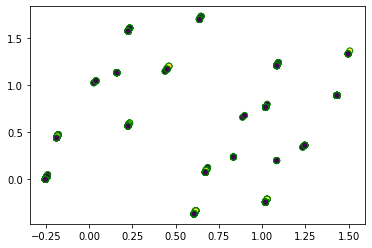

In [ ]:
plt.scatter(train_x_pca[:,0], train_x_pca[:,1], c=train_y, linewidths=1, edgecolors='green')
plt.show()

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler()
# oversampled_data, oversampled_label = ros.fit_resample(X, Y)
# oversampled_data = pd.DataFrame(oversampled_data, columns=X.columns)

In [ ]:
# print('원본데이터 클래스',format(pd.get_dummies(Y).sum()))
# print('오버샘플링 클래스',format(pd.get_dummies(oversampled_label).sum()))

![대체 텍스트](https://)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)

In [ ]:
print('원본데이터 클래스',format(pd.get_dummies(train_y).sum()))

원본데이터 클래스 0    12407
1      125
dtype: int64


In [ ]:
print('오버샘플링 클래스',format(pd.get_dummies(train_y_smote).sum()))

오버샘플링 클래스 0    12407
1    12407
dtype: int64


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train_x_smote)
train_x_smote_pca = pca.transform(train_x_smote)

In [ ]:
pd.DataFrame(train_x_smote_pca)

,0,1
0,0.393610,0.020520
1,-0.357747,-0.310381
2,-0.357748,-0.310380
3,-0.357748,-0.310380
4,-0.216317,1.016638
...,...,...
24809,0.371428,-0.504001
24810,1.345052,-0.434200
24811,-0.357486,-0.310518
24812,1.341419,-0.432270


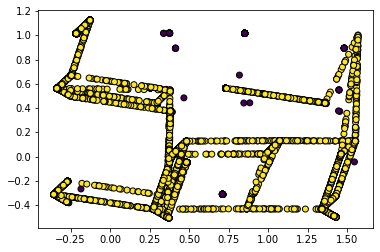

In [ ]:
plt.scatter(train_x_smote_pca[:,0], train_x_smote_pca[:,1], c=train_y_smote, linewidths=1, edgecolors='black')
plt.show()

In [ ]:
drop = ['id', 'lon', 'lat', '충전소수','복지관수(북구)','장애인등록(북구)','전동구(북구)','분류기준','시군구']
test_x = test.drop(drop, axis=1)
test_y = test['충전소수']

In [ ]:
print(test_x.shape)
print(test_y.shape)

(2479, 13)
(2479,)


In [ ]:
print('테스트데이터 클래스',format(pd.get_dummies(test_y).sum()))

테스트데이터 클래스 0    2452
1      27
dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
                    Dense(128, activation='relu', input_dim=train_x.shape[1]),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(16, activation='relu'),                    
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_path = 'tmp_model.ckpt'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_loss',verbose=1)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_x_smote, train_y_smote, epochs=20, batch_size=1, callbacks=[checkpoint], validation_data=(test_x, test_y))

Epoch 1/20
24790/24814 [============================>.] - ETA: 0s - loss: 0.4036 - acc: 0.8111
Epoch 00001: val_loss did not improve from 0.38004
24814/24814 [==============================] - 36s 1ms/step - loss: 0.4037 - acc: 0.8110 - val_loss: 0.4263 - val_acc: 0.9306
Epoch 2/20
24795/24814 [============================>.] - ETA: 0s - loss: 0.4005 - acc: 0.8124
Epoch 00002: val_loss did not improve from 0.38004
24814/24814 [==============================] - 36s 1ms/step - loss: 0.4006 - acc: 0.8123 - val_loss: 0.4887 - val_acc: 0.9262
Epoch 3/20
24782/24814 [============================>.] - ETA: 0s - loss: 0.4011 - acc: 0.8128
Epoch 00003: val_loss did not improve from 0.38004
24814/24814 [==============================] - 36s 1ms/step - loss: 0.4011 - acc: 0.8128 - val_loss: 0.4237 - val_acc: 0.9201
Epoch 4/20
24802/24814 [============================>.] - ETA: 0s - loss: 0.4023 - acc: 0.8128
Epoch 00004: val_loss did not improve from 0.38004
24814/24814 [=========================

In [ ]:
model.load_weights(checkpoint_path)
model.save("mymodel.h5")

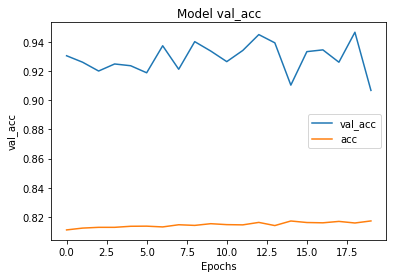

In [ ]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title("Model val_acc")
plt.xlabel('Epochs')
plt.ylabel('val_acc')
plt.legend(['val_acc','acc'])
plt.show()

In [ ]:
test_x

,건물1,건물2,건물3,도서관,나드리콜,지하철역,노인유동,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6
29297,1,0,0,0,0.000000,0,0.001036,1,0,0,0,0,0
29298,1,0,0,0,0.000000,0,0.000506,1,0,0,0,0,0
29299,1,0,0,0,0.000000,0,0.003061,1,0,0,0,0,0
29300,1,0,0,0,0.000000,0,0.023728,1,0,0,0,0,0
29597,0,1,0,0,0.000000,0,0.000759,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60801,0,1,0,0,0.000000,0,0.003452,1,0,0,0,0,0
60802,0,1,0,0,0.000000,0,0.001243,1,0,0,0,0,0
60804,1,0,0,0,0.000116,0,0.003936,1,0,0,0,0,0
61141,1,0,0,0,0.000000,0,0.000483,1,0,0,0,0,0


In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)
print('\n테스트 정확도:', test_acc)

78/78 - 0s - loss: 0.3769 - acc: 0.9238

테스트 정확도: 0.9237595796585083


In [ ]:
predictions = model.predict(test_x)

In [ ]:
preds = [ 1 if x>0.5 else 0 for x in predictions]
print(preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
test['preds_dnn'] = preds
test

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6,분류기준,preds_xgb,preds_dnn
29297,63793,128.50820,35.90023,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.001036,1,1,0,0,0,0,0,1,0,0
29298,63794,128.50819,35.89933,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.000506,1,1,0,0,0,0,0,1,0,0
29299,63795,128.50818,35.89843,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.003061,1,1,0,0,0,0,0,1,0,0
29300,63796,128.50817,35.89753,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.023728,1,1,0,0,0,0,0,1,0,0
29597,64249,128.50933,35.90203,0,0,1,0,0,0.000000,0,0,0.000000,0.000000,0.000759,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60801,114179,128.63000,35.89374,0,0,1,0,0,0.000000,0,0,0.000000,0.000000,0.003452,1,1,0,0,0,0,0,1,0,0
60802,114180,128.62998,35.89284,1,0,1,0,0,0.000000,0,1,0.089212,0.121569,0.001243,1,1,0,0,0,0,0,1,0,0
60804,114182,128.62996,35.89104,0,1,0,0,0,0.000116,0,0,0.000000,0.000000,0.003936,1,1,0,0,0,0,0,1,0,0
61141,114639,128.63108,35.89193,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.000483,1,1,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [ ]:
get_clf_eval(test_y , preds)

오차 행렬
[[2279  173]
 [  16   11]]
정확도: 0.9238, 정밀도: 0.0598, 재현율: 0.4074


In [ ]:
test_x.columns

Index(['건물1', '건물2', '건물3', '도서관', '나드리콜', '지하철역', '노인유동', '행정기관_0', '행정기관_1',
       '행정기관_2', '행정기관_3', '행정기관_4', '행정기관_6'],
      dtype='object')

In [ ]:
train_x_smote = pd.DataFrame(train_x_smote)
train_x_smote.columns = ['건물1', '건물2', '건물3', '도서관', '나드리콜', '지하철역', '노인유동', '행정기관_0', '행정기관_1',
       '행정기관_2', '행정기관_3', '행정기관_4', '행정기관_6']

In [ ]:
train_x_smote.head()

,건물1,건물2,건물3,도서관,나드리콜,지하철역,노인유동,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.000069,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb.fit(train_x_smote, train_y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions_xgb = xgb.predict(test_x)

In [ ]:
predictions_xgb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
preds_xgb = [ 1 if x>0.5 else 0 for x in predictions_xgb]
print(preds_xgb)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
test['preds_xgb'] = preds_xgb
test

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6,분류기준,preds_xgb
29297,63793,128.50820,35.90023,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.001036,1,1,0,0,0,0,0,1,0
29298,63794,128.50819,35.89933,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.000506,1,1,0,0,0,0,0,1,0
29299,63795,128.50818,35.89843,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.003061,1,1,0,0,0,0,0,1,0
29300,63796,128.50817,35.89753,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.023728,1,1,0,0,0,0,0,1,0
29597,64249,128.50933,35.90203,0,0,1,0,0,0.000000,0,0,0.000000,0.000000,0.000759,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60801,114179,128.63000,35.89374,0,0,1,0,0,0.000000,0,0,0.000000,0.000000,0.003452,1,1,0,0,0,0,0,1,0
60802,114180,128.62998,35.89284,1,0,1,0,0,0.000000,0,1,0.089212,0.121569,0.001243,1,1,0,0,0,0,0,1,0
60804,114182,128.62996,35.89104,0,1,0,0,0,0.000116,0,0,0.000000,0.000000,0.003936,1,1,0,0,0,0,0,1,0
61141,114639,128.63108,35.89193,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.000483,1,1,0,0,0,0,0,1,0


In [ ]:
get_clf_eval(test_y , preds_xgb)

오차 행렬
[[2372   80]
 [  22    5]]
정확도: 0.9589, 정밀도: 0.0588, 재현율: 0.1852


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
lgb.fit(train_x_smote, train_y_smote)
predictions_lgb = lgb.predict(test_x)
preds_lgb = [ 1 if x>0.5 else 0 for x in predictions_lgb]
get_clf_eval(test_y , preds_lgb)

오차 행렬
[[2366   86]
 [  22    5]]
정확도: 0.9564, 정밀도: 0.0549, 재현율: 0.1852


In [ ]:
test['preds_lgb'] = preds_lgb
test

,id,lon,lat,충전소수,건물1,건물2,건물3,도서관,나드리콜,지하철역,복지관수(북구),장애인등록(북구),전동구(북구),노인유동,시군구,행정기관_0,행정기관_1,행정기관_2,행정기관_3,행정기관_4,행정기관_6,분류기준,preds_xgb,preds_dnn,preds_lgb
29297,63793,128.50820,35.90023,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.001036,1,1,0,0,0,0,0,1,0,0,0
29298,63794,128.50819,35.89933,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.000506,1,1,0,0,0,0,0,1,0,0,0
29299,63795,128.50818,35.89843,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.003061,1,1,0,0,0,0,0,1,0,0,0
29300,63796,128.50817,35.89753,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.023728,1,1,0,0,0,0,0,1,0,0,0
29597,64249,128.50933,35.90203,0,0,1,0,0,0.000000,0,0,0.000000,0.000000,0.000759,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60801,114179,128.63000,35.89374,0,0,1,0,0,0.000000,0,0,0.000000,0.000000,0.003452,1,1,0,0,0,0,0,1,0,0,0
60802,114180,128.62998,35.89284,1,0,1,0,0,0.000000,0,1,0.089212,0.121569,0.001243,1,1,0,0,0,0,0,1,0,0,0
60804,114182,128.62996,35.89104,0,1,0,0,0,0.000116,0,0,0.000000,0.000000,0.003936,1,1,0,0,0,0,0,1,0,0,0
61141,114639,128.63108,35.89193,0,1,0,0,0,0.000000,0,0,0.000000,0.000000,0.000483,1,1,0,0,0,0,0,1,0,0,0


In [ ]:
test.columns

Index(['id', 'lon', 'lat', '충전소수', '건물1', '건물2', '건물3', '도서관', '나드리콜', '지하철역',
       '복지관수(북구)', '장애인등록(북구)', '전동구(북구)', '노인유동', '시군구', '행정기관_0', '행정기관_1',
       '행정기관_2', '행정기관_3', '행정기관_4', '행정기관_6', '분류기준', 'preds_xgb',
       'preds_dnn', 'preds_lgb'],
      dtype='object')

In [ ]:
test.to_csv('test.csv', index=False, encoding='cp949')